# **Prepatación de los datos - AluraStore**



## Importación de datos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



**1.1. Ingreso total por cada tienda:**
En este primer análisis, se debe calcular el ingreso total de cada tienda. Sumando los valores de la columna *Precio* de cada conjunto de datos de la tienda para estimar los ingresos.

### a. Explora los datos primero

In [ ]:
tienda.head()
tienda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


### b. Suma los ingresos por tienda

Se usa un bucle for para recorrer un diccionario que contiene los nombres de las tiendas y sus respectivos DataFrames. Esto es una forma limpia y reutilizable. También se le agrega el signo Pesos ("$"), y separador de miles y 2 decimales como mínimo.

In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombreTienda, df in tiendas.items():
    ingreso_total = df['Precio'].sum()
    print(f"El ingreso total de {nombreTienda} es: ${ingreso_total:,.2f}")


El ingreso total de Tienda 1 es: $1,150,880,400.00
El ingreso total de Tienda 2 es: $1,116,343,500.00
El ingreso total de Tienda 3 es: $1,098,019,600.00
El ingreso total de Tienda 4 es: $1,038,375,700.00


### c. Gráfico escogido: Gráfico de barras verticales
Se ordenan las barras de mayor a menor para enfatizar cuál es la que más vende.

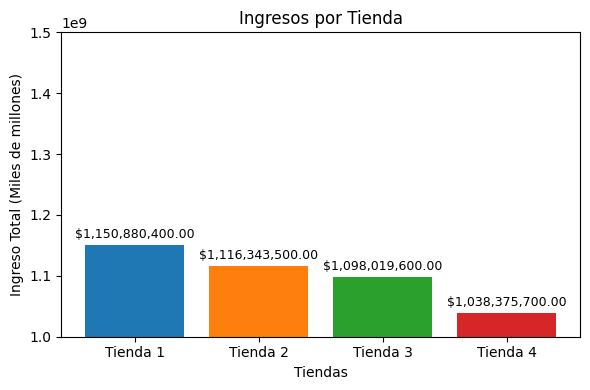

In [ ]:
import matplotlib.pyplot as plt

# Crea el diccionario de ingresos
ingresos = {
    "Tienda 1": tienda['Precio'].sum(),
    "Tienda 2": tienda2['Precio'].sum(),
    "Tienda 3": tienda3['Precio'].sum(),
    "Tienda 4": tienda4['Precio'].sum()
}

# Colores personalizados por tienda
colores_tiendas = {
    'Tienda 1': '#1f77b4',  # azul
    'Tienda 2': '#ff7f0e',  # naranja
    'Tienda 3': '#2ca02c',  # verde
    'Tienda 4': '#d62728'   # rojo
}


# Separa las claves (nombres de tiendas) y los valores (ingresos)
ingresos_ordenados = dict(sorted(ingresos.items(), key=lambda x: x[1], reverse=True))
nombres = list(ingresos_ordenados.keys())
valores = list(ingresos_ordenados.values())

# Aplicar colores personalizados
colores = [colores_tiendas[nombres] for nombres in ingresos_ordenados.keys()]

# Crea la gráfica de barras
plt.figure(figsize=(6, 4))  # Tamaño de la gráfica
plt.bar(nombres, valores, color= colores)  # Barras

plt.title("Ingresos por Tienda")  # Título
plt.xlabel("Tiendas")             # Etiqueta eje X
plt.ylabel("Ingreso Total (Miles de millones)")       # Etiqueta eje Y
plt.ylim(1000000000, 1500000000)

# Opcional: agrega etiquetas de valor encima de cada barra
for i, valor in enumerate(valores):
    plt.text(i, valor + max(valores)*0.01, f"${valor:,.2f}", ha='center', fontsize=9)

plt.tight_layout()  # Ajusta el diseño
plt.show()          # Muestra la gráfica


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

Para cada tienda:

a. Agrupar por categoría.

b. Contar cuántas veces aparece cada categoría (eso representa las ventas por tipo de producto).

c. Ordenar para ver las más populares primero.

d.Graficar los resultados.

In [ ]:

for nombreTienda, df in tiendas.items():
    print(f"\nVentas por categoría en {nombreTienda}:")
    print(df['Categoría del Producto'].value_counts().sort_values(ascending=False))




Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ven

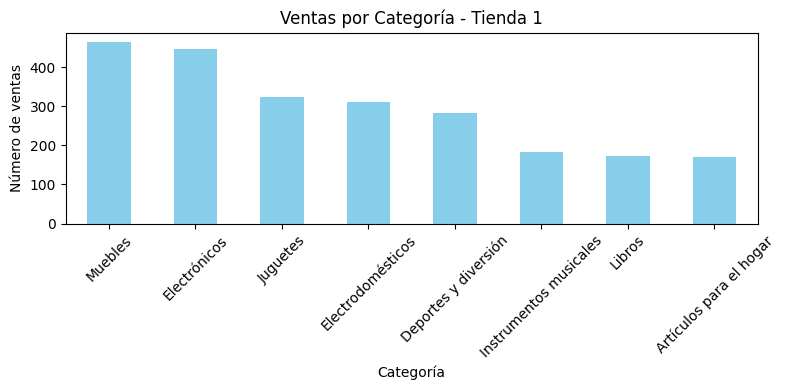

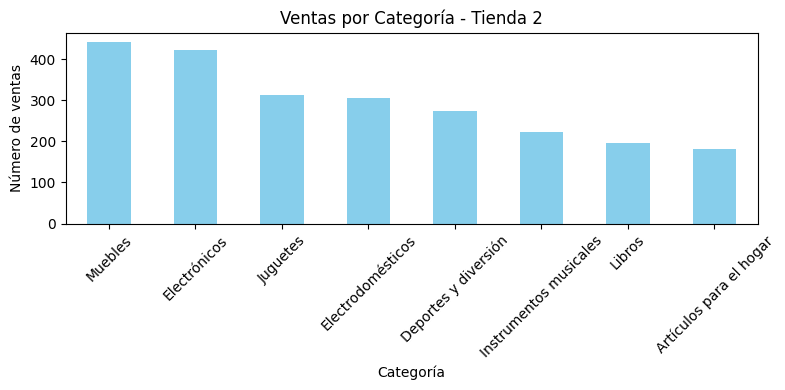

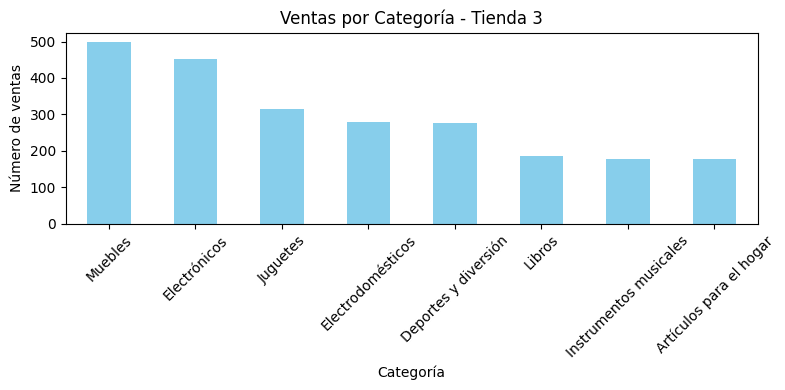

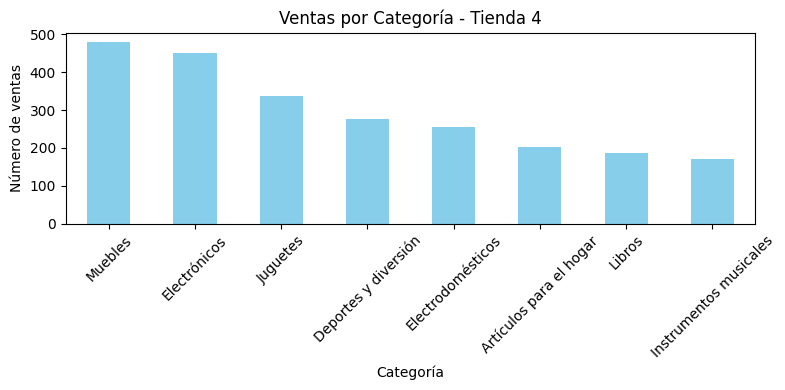

In [ ]:
for nombreTienda, df in tiendas.items():
    ventas_por_categoria = df['Categoría del Producto'].value_counts().sort_values(ascending=False)

    plt.figure(figsize=(8, 4))
    ventas_por_categoria.plot(kind='bar', color='skyblue')

    plt.title(f"Ventas por Categoría - {nombreTienda}")
    plt.xlabel("Categoría")
    plt.ylabel("Número de ventas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 2.1. También podría hacer un comparativo de todas las tiendas
Para ello se necesita construir un DataFrame nuevo que tenga:

*   Filas = Categorías
*   Columnas = Tiendas
*   Valores = Cantidad de ventas


### a. Crear el DataFrame combinado

In [ ]:
ventas_categorias = pd.DataFrame()

for nombreTienda, df in tiendas.items():
    conteo = df['Categoría del Producto'].value_counts()
    ventas_categorias[nombreTienda] = conteo



### b. Graficar

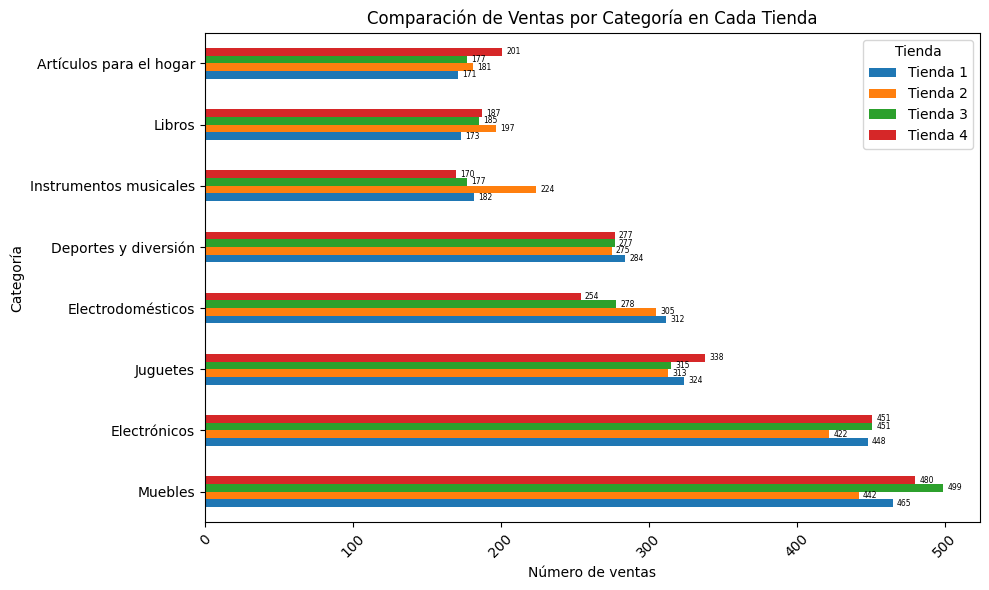

In [ ]:
ax = ventas_categorias.plot(kind='barh', figsize=(10, 6))

plt.title("Comparación de Ventas por Categoría en Cada Tienda")
plt.xlabel("Número de ventas")
plt.ylabel("Categoría")
plt.xticks(rotation=45)
plt.legend(title="Tienda")

# Añadir etiquetas a cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', padding=3, fontsize=5.5)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

Para solucionar este ejercicio se utiliza la el metodo mean(), y combinado con un ciclo for, para hacerlo mas limpio.

In [ ]:
for nombreTienda, df in tiendas.items():
    promedio = df['Calificación'].mean()
    print(f"Calificación promedio de {nombreTienda}: {promedio:.2f}")

Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


También se podría graficar los primedios, para un mejor entendimiento.

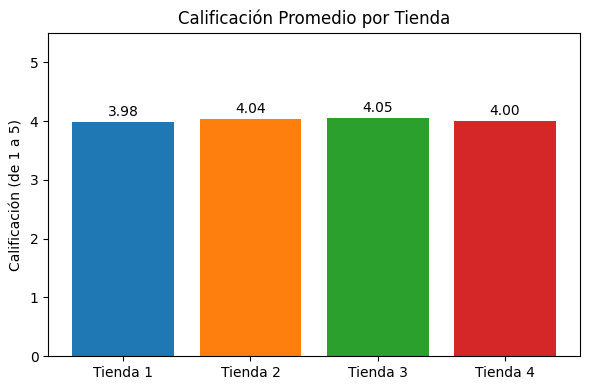

In [ ]:
# Diccionario para guardar los promedios
calificacion_promedio = {nombreTienda: df['Calificación'].mean() for nombreTienda, df in tiendas.items()}

# Crear gráfica
plt.figure(figsize=(6, 4))
plt.bar(calificacion_promedio.keys(), calificacion_promedio.values(), color=colores)

# Agregar etiquetas
for i, (tienda, valor) in enumerate(calificacion_promedio.items()):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', va='bottom')

plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación (de 1 a 5)")
plt.ylim(0, 5.5)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

Para identificar los productos más y menos vendidos por tienda, se puede usar value_counts() sobre la columna "Producto".

## a. Contar ventas por producto

In [ ]:
for nombreTienda, df in tiendas.items():
    print(f"\n{nombreTienda} - Productos más vendidos:")
    print(df['Producto'].value_counts().head(5))  # top 5 más vendidos

    print(f"\n{nombreTienda} - Productos menos vendidos:")
    print(df['Producto'].value_counts().tail(5))  # bottom 5 menos vendidos



Tienda 1 - Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Tienda 1 - Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Tienda 2 - Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Tienda 2 - Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3 - Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Na

## b. Visualizar los más vendidos

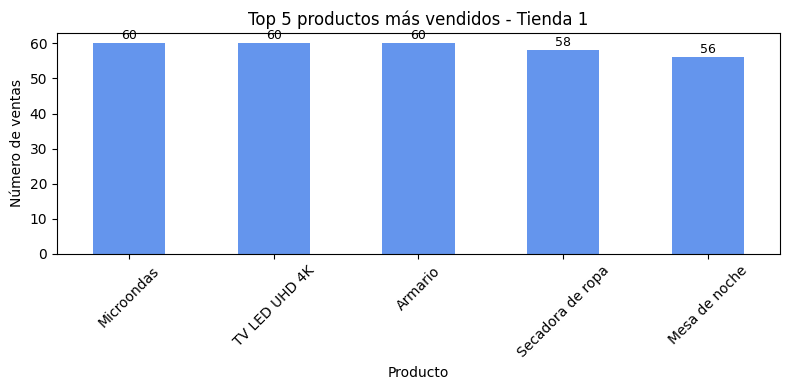

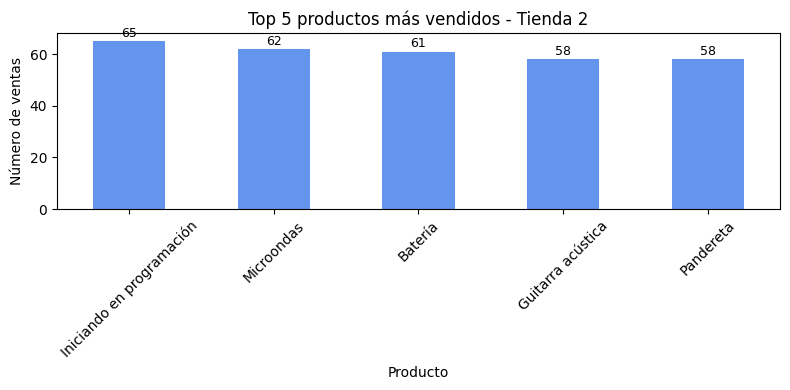

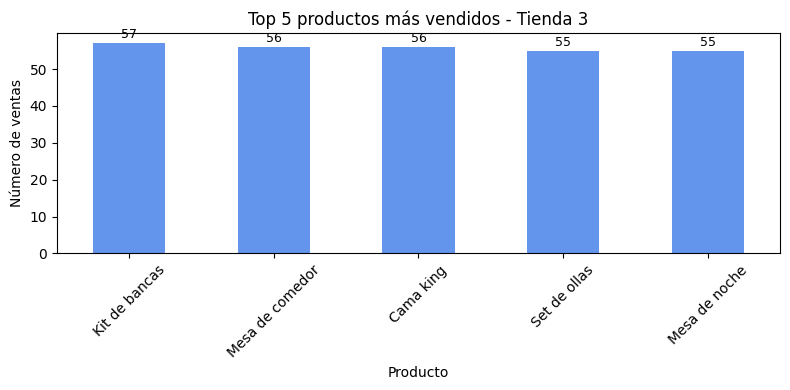

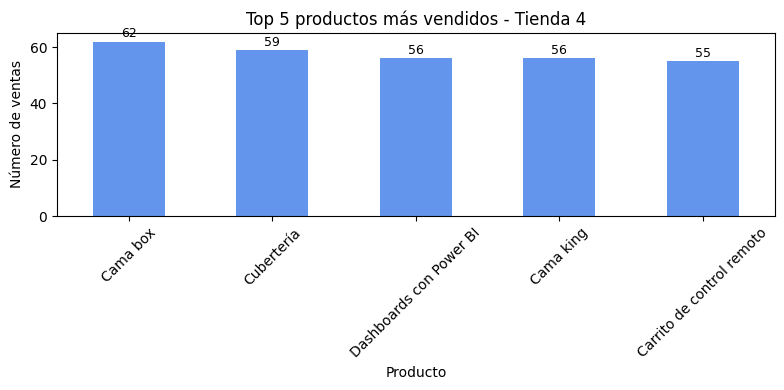

In [ ]:
for nombreTienda, df in tiendas.items():
    top_productos = df['Producto'].value_counts().head(5)

    plt.figure(figsize=(8, 4))
    ax = top_productos.plot(kind='bar', color='cornflowerblue')

    plt.title(f"Top 5 productos más vendidos - {nombreTienda}")
    plt.xlabel("Producto")
    plt.ylabel("Número de ventas")
    plt.xticks(rotation=45)

    # Etiquetas en las barras
    for i, valor in enumerate(top_productos):
        ax.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


## c. Visualizar los menos vendidos

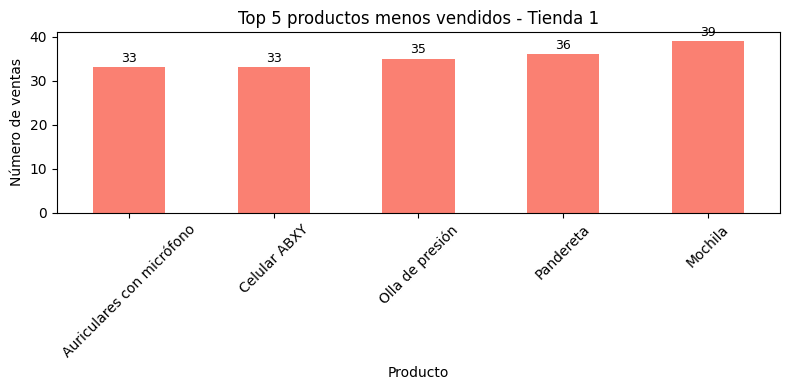

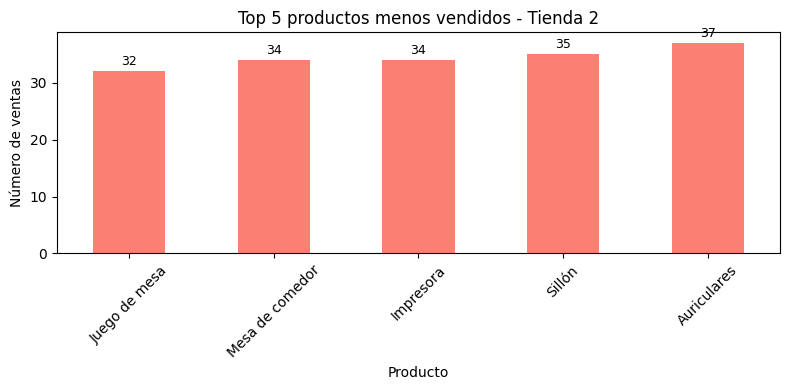

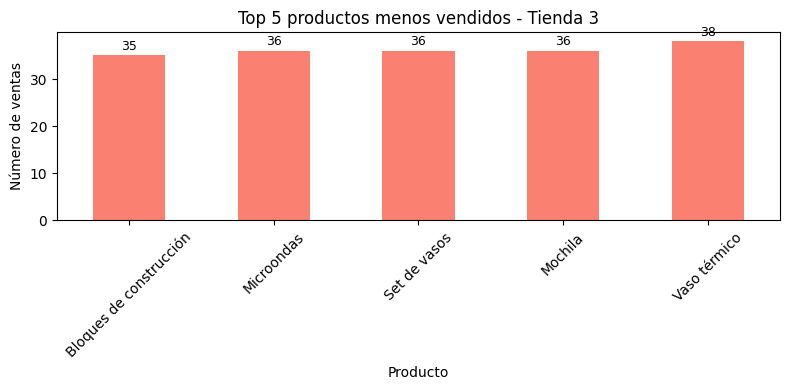

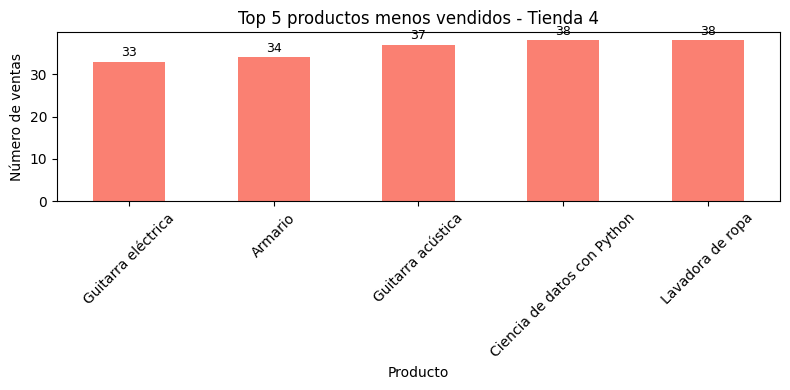

In [ ]:
for nombreTienda, df in tiendas.items():
    bottom_productos = df['Producto'].value_counts().sort_values().head(5)

    plt.figure(figsize=(8, 4))
    ax = bottom_productos.plot(kind='bar', color='salmon')

    plt.title(f"Top 5 productos menos vendidos - {nombreTienda}")
    plt.xlabel("Producto")
    plt.ylabel("Número de ventas")
    plt.xticks(rotation=45)

    for i, valor in enumerate(bottom_productos):
        ax.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


## d. Todo en una sola gráfica.

<ipython-input-17-89da7b4b93fb>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-17-89da7b4b93fb>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


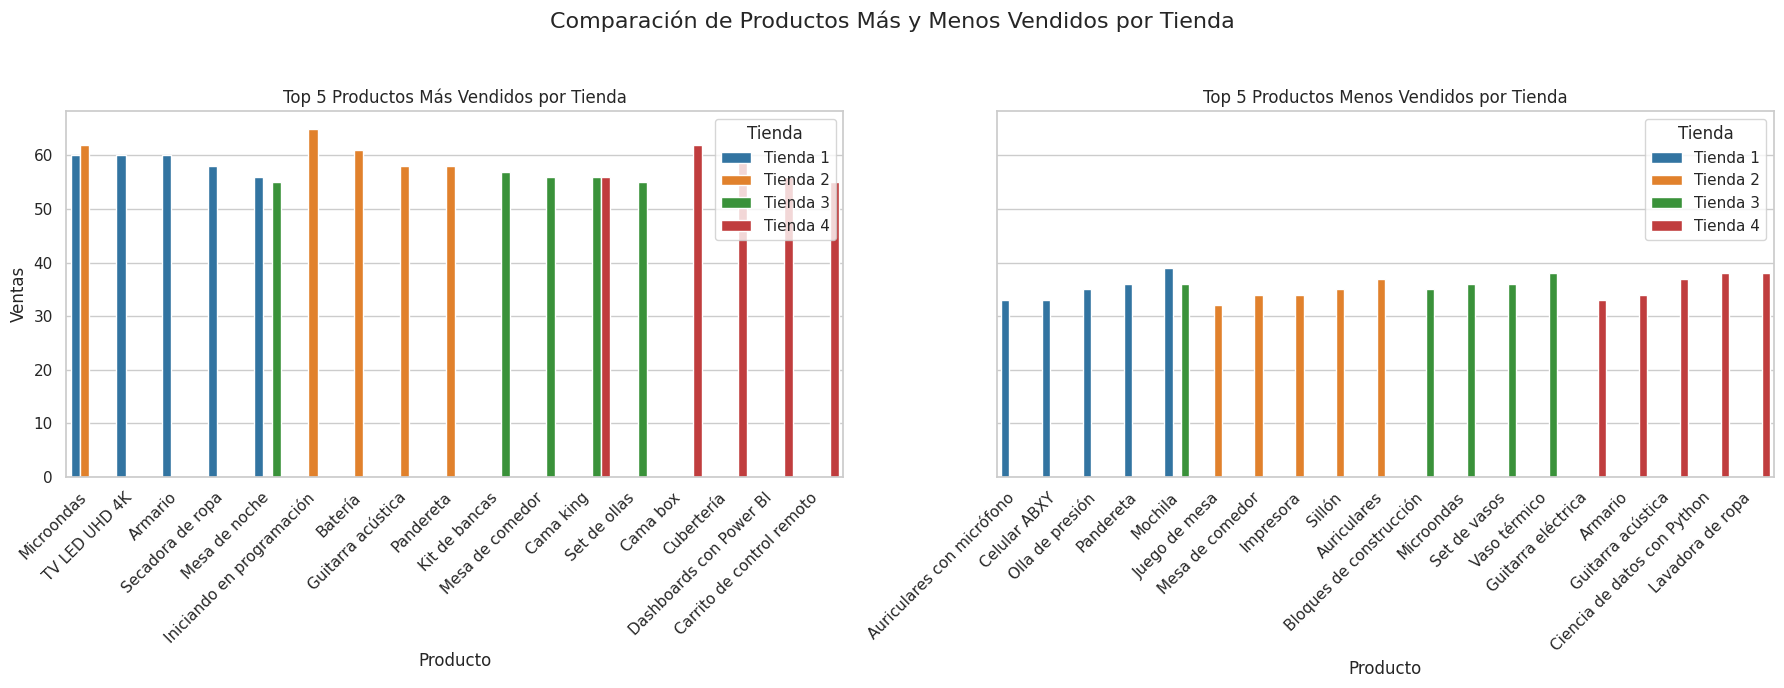

In [ ]:
import seaborn as sns

# Preparar los datos
data = []
for tienda, df in tiendas.items():
    top = df['Producto'].value_counts().head(5)
    bottom = df['Producto'].value_counts().sort_values().head(5)

    for producto, ventas in top.items():
        data.append({'Producto': producto, 'Ventas': ventas, 'Tienda': tienda, 'Tipo': 'Más Vendido'})
    for producto, ventas in bottom.items():
        data.append({'Producto': producto, 'Ventas': ventas, 'Tienda': tienda, 'Tipo': 'Menos Vendido'})

df_total = pd.DataFrame(data)

# Configurar estilo
sns.set(style="whitegrid")

# Crear figura con subgráficos (2 columnas: más y menos vendidos)
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Gráfico para más vendidos
sns.barplot(
    data=df_total[df_total['Tipo'] == 'Más Vendido'],
    x='Producto', y='Ventas', hue='Tienda',
    palette=colores_tiendas, ax=axes[0]
)
axes[0].set_title("Top 5 Productos Más Vendidos por Tienda")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Gráfico para menos vendidos
sns.barplot(
    data=df_total[df_total['Tipo'] == 'Menos Vendido'],
    x='Producto', y='Ventas', hue='Tienda',
    palette=colores_tiendas, ax=axes[1]
)
axes[1].set_title("Top 5 Productos Menos Vendidos por Tienda")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Etiquetas generales
fig.suptitle("Comparación de Productos Más y Menos Vendidos por Tienda", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# 5. Costo de Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

Para calcular el costo de envío promedio por tienda, se puede seguir una lógica muy similar a lo que se hizo con la calificación promedio.

In [ ]:
for nombreTienda, df in tiendas.items():
    promedio_envio = df['Costo de envío'].mean()
    print(f"Costo de envío promedio en {nombreTienda}: ${promedio_envio:.2f}")


Costo de envío promedio en Tienda 1: $26018.61
Costo de envío promedio en Tienda 2: $25216.24
Costo de envío promedio en Tienda 3: $24805.68
Costo de envío promedio en Tienda 4: $23459.46


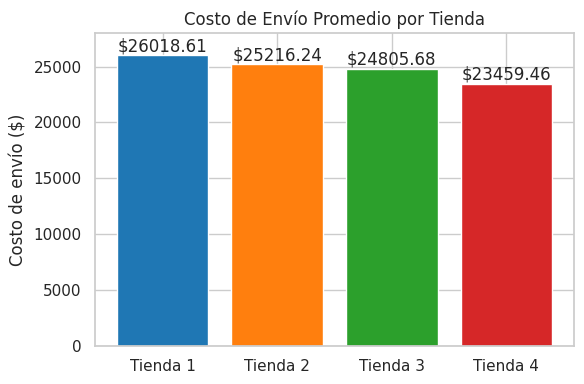

In [ ]:
# Diccionario con promedios
envio_promedio = {nombreTienda: df['Costo de envío'].mean() for nombreTienda, df in tiendas.items()}

# Gráfico de barras
plt.figure(figsize=(6, 4))
ax = plt.bar(envio_promedio.keys(), envio_promedio.values(), color=colores)

# Etiquetas en las barras
for i, valor in enumerate(envio_promedio.values()):
    plt.text(i, valor + 0.1, f"${valor:.2f}", ha='center', va='bottom')

plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de envío ($)")
plt.ylim(0, max(envio_promedio.values()) + 2000)
plt.tight_layout()
plt.show()


Para comparar visualmente las métricas entre las tiendas. A continuación se muestra un resumen con pandas y seaborn, usando las métricas que ya se calcularon:

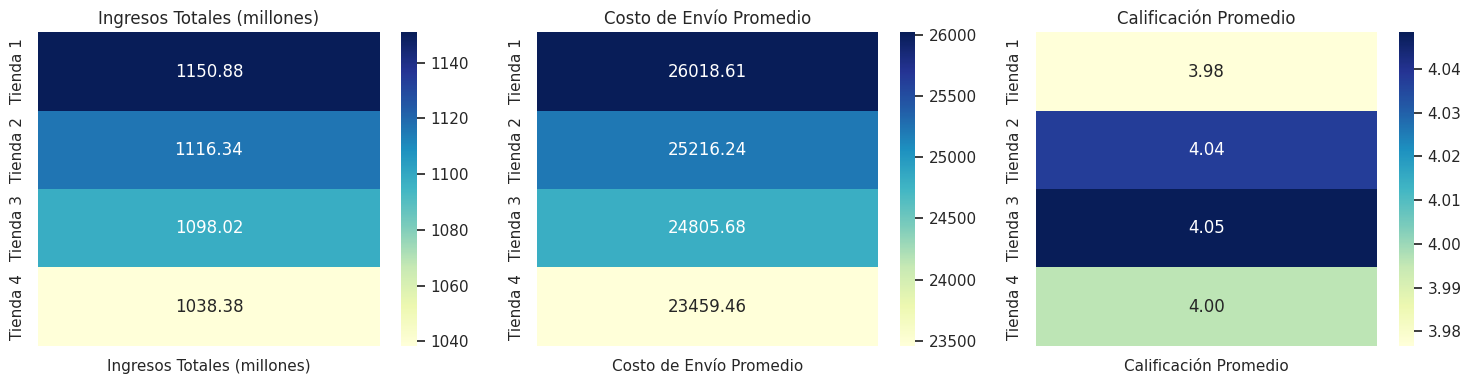

In [ ]:
# Crear DataFrame
resumen = pd.DataFrame({
    'Ingresos Totales (millones)': {k: v/1_000_000 for k, v in ingresos.items()},
    'Costo de Envío Promedio': envio_promedio,
    'Calificación Promedio': calificacion_promedio
})

# Establecer el tamaño general de las figuras
plt.figure(figsize=(15, 4))

# Métricas a graficar
metricas = ['Ingresos Totales (millones)', 'Costo de Envío Promedio', 'Calificación Promedio']

# Crear un subplot por cada métrica
for i, metrica in enumerate(metricas, 1):
    plt.subplot(1, 3, i)
    sns.heatmap(resumen[[metrica]], annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title(metrica)

# Ajustar el diseño
plt.tight_layout()
plt.show()


# **Informe Final: Recomendación de Venta**

## Introducción


El presente informe tiene como objetivo analizar el rendimiento de las cuatro tiendas que componen la cadena Alura Store para identificar cuál de ellas debe ser vendida como parte de la estrategia del Sr. Juan. El análisis se basa en cinco métricas clave:

1.   Ingresos Totales
2.   Rendimiento por categorías de productos.
3.   Calificaciones de clientes.
4.   Productos más y menos vendidos
5.   Costos de envío promedio.

## 1.   Ingresos Totales

El análisis de ingresos revela diferencias significativas entre las tiendas:

*   Tienda 1: $1,150,880,400 millones (líder en ingresos)

*   Tienda 2: $1,116,343,500 millones

*   Tienda 3: $1,098,019,600 millones


*   Tienda 4: $1,038,375,700 millones (menor rendimiento)


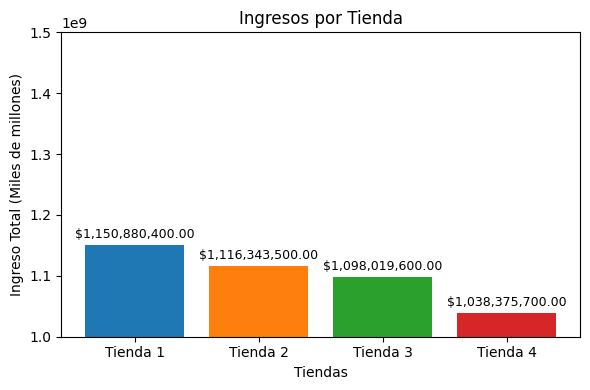



La **Tienda 4** presenta los **ingresos más bajos**, con una diferencia de $112.5 millones respecto al líder (Tienda 1), lo que representa un 9.8% menos de facturación.

## 2.   Rendimiento por categorías de productos.

El análisis de ventas por categoría muestra patrones consistentes:

**Categorías de mayor rendimiento:**
  *   Muebles: categoría líder en todas las tiendas (442-499 ventas)
  *   Electrónicos: segunda categoría más fuerte (422-451 ventas)
  *   Juguetes: tercera posición (313-338 ventas)


**Categorías de menor rendimiento:**
*   Artículos para el hogar: rendimiento más débil en todas las tiendas (171-201 ventas)
*   Libros: segunda categoría más débil (173-197 ventas)
*   Instrumentos musicales: tercera desde abajo (170-224 ventas)

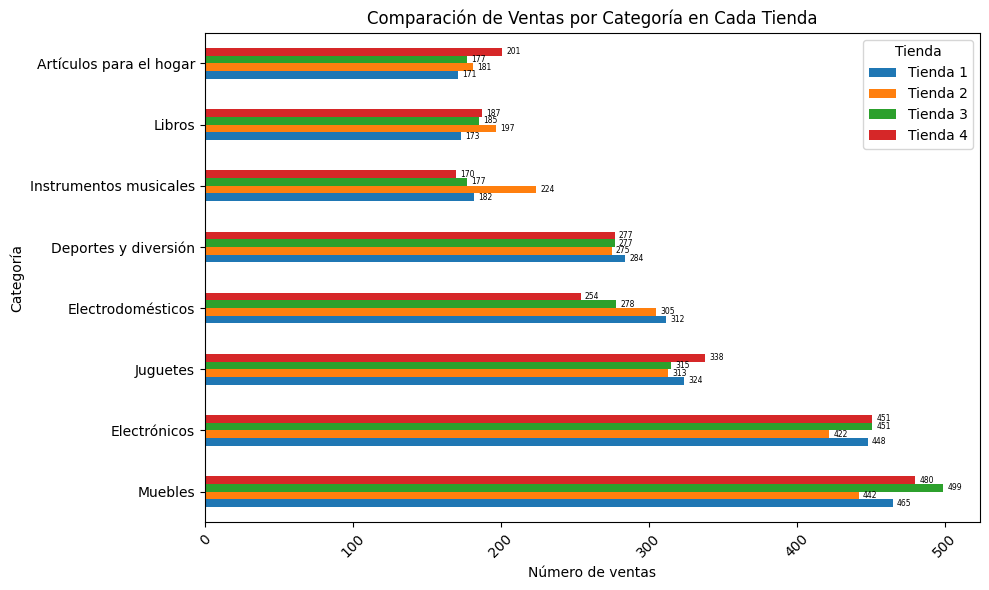


La **Tienda 4** muestra números en el rango inferior en la mayoría de categorías, especialmente notable en Instrumentos musicales (170 ventas vs 224 de la Tienda 2).

## 3.   Calificaciones de clientes.

Las calificaciones promedio revelan una perspectiva interesante:

*   Tienda 3: 4.05 (mejor calificación)
*   Tienda 2: 4.04
*   Tienda 4: 4.00
*   Tienda 1: 3.98 (menor calificación)

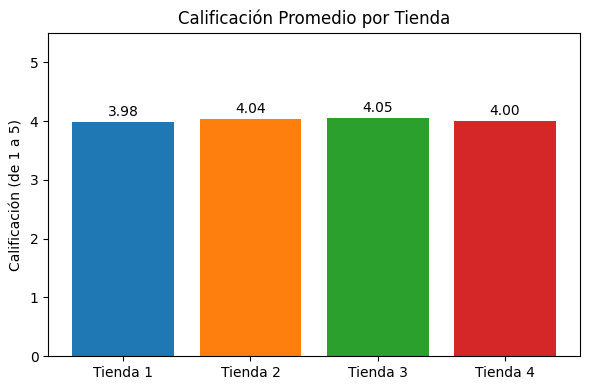

La **Tienda 1** (líder en ingresos) tiene la **calificación más baja**, mientras que la **Tienda 4** mantiene una calificación razonable de 4.00 (Tercer lugar).


## 4.   Productos más y menos vendidos

**Productos más vendidos:**


*   La Tienda 2 domina con productos como "Iniciación en programación" (65 ventas) y "Batería" (61 ventas)
*   Las Tiendas 1 y 3 muestran rendimientos similares en productos top
*   La Tienda 4 presenta números consistentemente menores en productos estrella


**Productos menos vendidos:**
*   Todas las tiendas muestran patrones similares en productos de bajo rendimiento
*   La Tienda 4 no presenta ventajas significativas en ningún segmento de productos

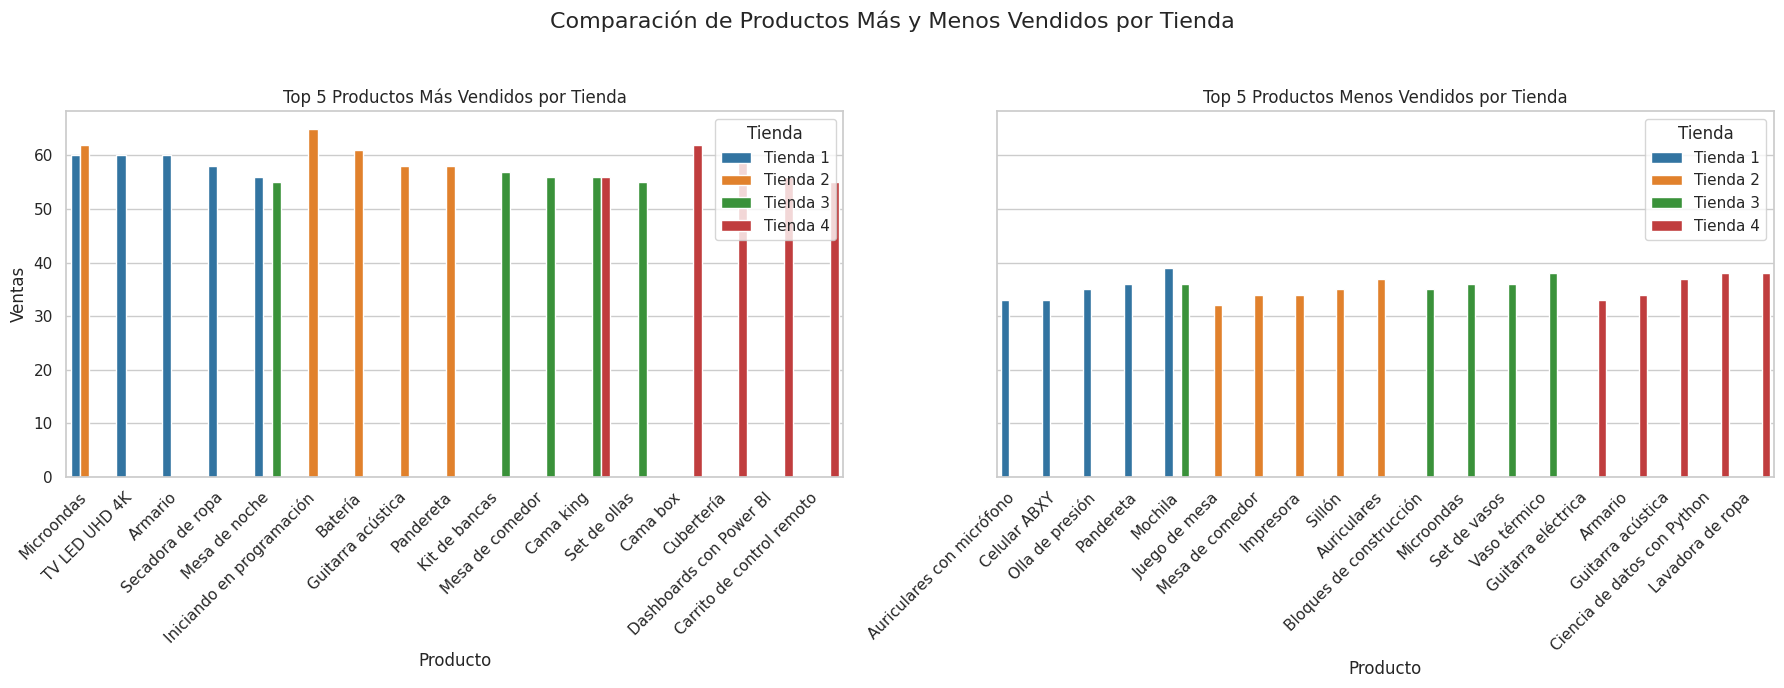




## 5.   Costos de envío promedio.

Los costos logísticos por tienda son:


*   Tienda 1: $26,018.61 (mayor costo)

*   Tienda 2: $25,216.24

*   Tienda 3: $24,805.68

*   Tienda 4: $23,459.46 (menor costo)

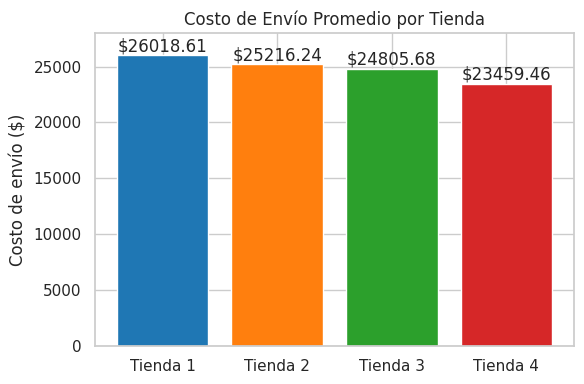


La **Tienda 4** presenta la ventaja de **menores costos de envío**, con un ahorro de $2,559.15 respecto a la **Tienda 1**.



## 6. Análisis Integral y Fortalezas/Debilidades


**Tienda 1**



*   **Fortalezas:** Líder absoluto en ingresos, buen rendimiento en categorías clave
*   **Debilidades:** Menor calificación de clientes (3.98), costos de envío más altos


**Tienda 2**

*   **Fortalezas:** Excelente rendimiento en productos específicos, buena calificación (4.04 -Segundo lugar-), segundo lugar en ingresos
*   **Debilidades:** Costos de envío elevados


**Tienda 3**


*   **Fortalezas:** Mejor calificación de clientes (4.05 -Primer Lugar-), costos de envío moderados, rendimiento equilibrado
*   **Debilidades:** Ingresos por debajo del líder


**Tienda 4**


*   **Fortalezas:** Menores costos de envío, calificación aceptable de clientes
*   **Debilidades:** Menores ingresos totales, rendimiento inferior en la mayoría de categorías y productos


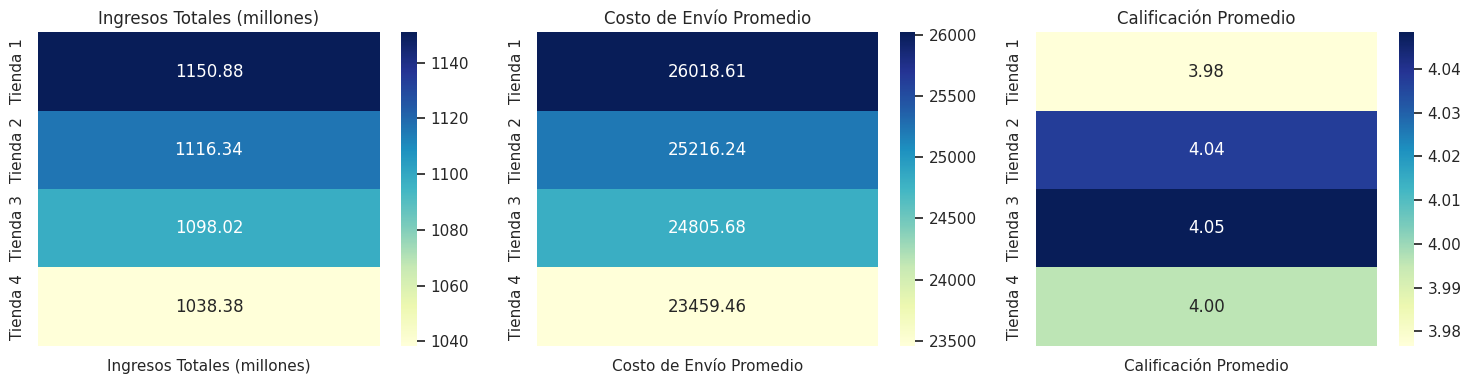




## 7. Conclusión y Recomendación

**Recomendación: vender la Tienda 4**

Basado en el análisis integral de los datos, la Tienda 4 presenta el perfil menos eficiente de la cadena por las siguientes razones:



1.   **Rendimiento financiero inferior:** Con $1,038,375,700 millones en ingresos, es la tienda menos rentable, generando 9.8% menos que el líder.
2.   **Desempeño menor:** En prácticamente todas las categorías de productos y productos individuales, la Tienda 4 muestra números en el rango inferior.
3. **Potencial limitado:** A pesar de tener costos de envío menores, esta ventaja no compensa las deficiencias en ventas y no se traduce en mayor rentabilidad.

La única ventaja significativa de la Tienda 4 (menores costos de envío) no es suficiente para compensar su bajo rendimiento en ventas. Mantener las Tiendas 1, 2 y 3 garantizará la conservación de los mayores generadores de ingresos, mejor satisfacción del cliente, y un portafolio más sólido de productos exitosos.
